In [1]:
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The goal is to predict the value of homes in several Boston neighborhoods in the
1970s, using information such as crime rate, property tax rate, distance to employment centers, and
highway accessibility

In [2]:
# Loading the dataset
boston = datasets.load_boston()

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [4]:
# The dataset contains a total of 506 data points, each of which has 13 features
boston.data.shape

(506, 13)

In [5]:
# We have only a single target value, which is the housing price
boston.target.shape

(506,)

In [6]:
linreg = linear_model.LinearRegression()

In [8]:
# split the data into training and test sets.
# It is a good idea to reserve between 10 percent and 30 percent for testing
X_train, X_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target, test_size=0.1, random_state=42)

In [9]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# The mean squared error of our predictions (comparing the true housing prices, y_train , 
#to our predictions, linreg.predict(X_train))
metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.73948415423661

In [11]:
# The score method of the linreg object returns the coefficient of determination (R squared)
linreg.score(X_train, y_train)

0.73749340919011974

In [16]:
#In order to test the generalization performance of the model, we calculate the mean squared error on the test data
y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

15.010997321630171

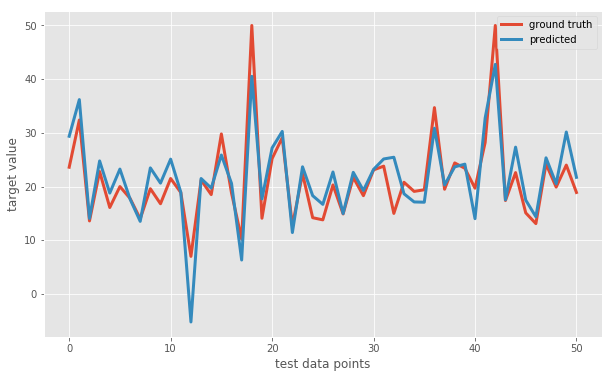

In [14]:
# The mean squared error is a little lower on the test set than the training set. This is good news, 
# as we care mostly about the test error. Plot that for good understanding:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

  * we see the ground truth housing prices for all test samples in blue and our predicted housing prices in red.

 * It is interesting to note though that the model tends to be off the most for really high or really low housing prices, such as the peak values of data point 12, 18, and 42. We can formalize the amount of variance in the data that we were able to explain by calculating R squared.

* This will plot the ground truth prices, y_test , on the x axis, and our predictions, y_pred , on the y axis. We also plot a diagonal line for reference (using a black dashed line, 'k--' ), as we will see soon. But we also want to display the R 2 score and mean squared error in a text box:

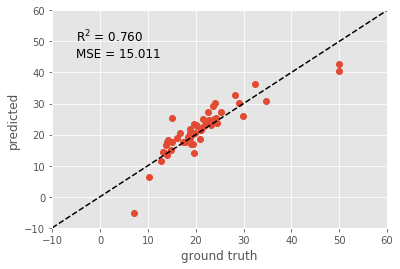

In [15]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

 * If our model was perfect, then all data points would lie on the dashed diagonal, since y_pred would always be equal to y_true . Deviations from the diagonal indicate that the model made some errors, or that there is some variance in the data that the model was not able to explain. Indeed, R2 indicates that we were able to explain 76 percent of the scatter in the data, with a mean squared error of 15.011.

## Applying Lasso and ridge regression

A common problem in machine learning is that an algorithm might work really well on the training set, but when applied to unseen data it makes a lot of mistakes. You can see how this is problematic, since often we are most interested in how a model ** generalizes ** to new data. Some algorithms (such as decision trees) are more susceptible to this phenomenon than others, but even linear regression can be affected. This phenomeon is also known as ** overfitting **.

A common technique for reducing overfitting is called **regularization**, which involves adding an additional constraint to the cost function that is independent of all feature values. The two most commonly used **regularizors** are as follows:

* **L1 regularization**: This adds a term to the scoring function that is proportional to the sum of all absolute weight values. In other words, it is based on the **L1 norm** of the weight vector (also known as the **rectilinear distance, snake distance**, or **Manhattan distance**). Due to the grid layout of Manhattan's streets, the L1 norm is akin to measuring the distance a New York cab driver covers by driving from point A to B. The resulting algorithm is also known as Lasso regression.
* **L2 regularization**: This adds a term to the scoring function that is proportional to the sum of all squared weight values. In other words, it is based on the **L2 norm** of the weight vector (also known as the **Euclidean distance**). Since the L2 norm involves a squaring operation, it punishes strong outliers in the weight vector much harder than the L1 norm. The resulting algorithm is also known as **ridge regression**.

* For the Lasso regression algorithm, we would change the (linreg = linear_model.LinearRegression()) in line 6 to the following:

In [ ]:
lassoreg = linear_model.Lasso()

* For the ridge regression, we would change the (linreg = linear_model.LinearRegression()) in line 6to the following:

In [ ]:
ridgereg = linear_model.RidgeRegression()